In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

In [2]:
#impoting data
data=pd.read_csv("train.csv")
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [3]:
data.shape

(14999, 9)

#Assigning each category a number for category feature

In [4]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data["category"]=data["category"].map(category)
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


Removing character "f" present in data

In [5]:
data=data[data.views!='F']
data=data[data.likes!='F']
data=data[data.dislikes!='F']
data=data[data.comment!='F']

Convert values to integers for views,likes,comments,dislikes and adview

In [6]:
data["views"]=pd.to_numeric(data["views"])
data["comment"]=pd.to_numeric(data["comment"])
data["likes"]=pd.to_numeric(data["likes"])
data["dislikes"]=pd.to_numeric(data["dislikes"])
data["adview"]=pd.to_numeric(data["adview"])

In [7]:
column_vidid=data['vidid']

Encoding features like category ,Duration,Vidid

In [8]:
from sklearn.preprocessing import LabelEncoder
data['duration']=LabelEncoder().fit_transform(data['duration'])
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])

In [9]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


Converting time_in_sec for duration

In [10]:
import datetime
import time

In [11]:
def checkli(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    p = ['H', 'M', 'S']
    for i in y:
        if i not in p:
            mm += i
        else:
            if i == "H":
                h = mm
                mm = ''
            elif i == "M":
                m = mm
                mm = ''
    if h == '':
        h = '00'
    if m == '':
        m = '00'
    if s == '':
        s = '00'
    bp = h + ':' + m + ':' + s
    return bp

Train = pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]

# Ensure 'checkli' handles unexpected or missing values
time = mp.apply(checkli )

def func_sec(time_string):
    if not time_string:
        return 0  # Return 0 for empty strings

    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1 = time.apply(func_sec)

data["duration"] = time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,420,6
1,2741,2,1707,56,2,6,2185,540,4
2,8138,1,2023,25,0,2,2094,120,3
3,9005,6,620860,777,161,153,2119,240,8
4,122,1,666,1,0,0,2091,0,4


Visualization

Individual plots

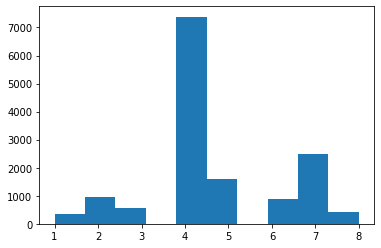

In [12]:
plt.hist(data["category"])
plt.show()

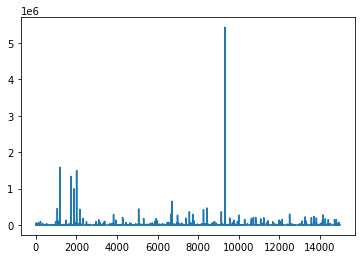

In [13]:
plt.plot(data["adview"])
plt.show()

Remove videos with adview greater than 2000000 as outlier

In [14]:
data=data[data["adview"]<2000000]

Heatmap

In [15]:
import seaborn as sns 

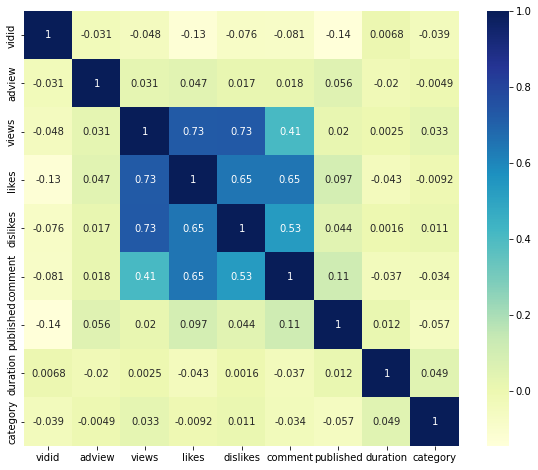

In [16]:
f,ax= plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='YlGnBu', square=True, ax=ax, annot=True)
plt.show()

Split data

In [17]:
y_train= pd.DataFrame(data=data.iloc[:,1].values, columns=['target'])
data=data.drop(["adview"],axis=1)
data=data.drop(["vidid"],axis=1)
data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,420,6
1,1707,56,2,6,2185,540,4
2,2023,25,0,2,2094,120,3
3,620860,777,161,153,2119,240,8
4,666,1,0,0,2091,0,4


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,y_train,test_size=0.2,random_state=42)
X_train.shape 

(11708, 7)

Normalize Data

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


Evaluation Matrics

In [20]:
from sklearn import metrics
def print_error(x_test,y_test,model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Linear Regression

In [21]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
print_error(X_test,y_test,linear_regression)

Mean Absolute Error: 3707.8322578945586
Mean Squared Error: 835653609.0203481
Root Mean Squared Error: 28907.673877715377


Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree)


Mean Absolute Error: 2396.940232240437
Mean Squared Error: 652194587.755806
Root Mean Squared Error: 25538.10070768392


Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest =RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth , min_samples_split=min_samples_split ,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test,random_forest)

d:\Anaconda\envs\Myprogram\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean Absolute Error: 3301.550416971338
Mean Squared Error: 610930216.8122844
Root Mean Squared Error: 24717.00258551357


Support Vector Regressor

In [24]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test,linear_regression)

d:\Anaconda\envs\Myprogram\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 3707.8322578945586
Mean Squared Error: 835653609.0203481
Root Mean Squared Error: 28907.673877715377


Artificial Neural Network

In [25]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6,activation="relu",input_shape = X_train.shape[1:]),Dense(6,activation="relu"),Dense(1)])
optimizer = keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history = ann.fit(X_train,y_train,epochs=100)

Epoch 1/100
366/366 [==============================] - 0s 608us/step - loss: 767407232.0000 - mean_squared_error: 767407232.0000
Epoch 2/100
366/366 [==============================] - 0s 522us/step - loss: 767403328.0000 - mean_squared_error: 767403328.0000
Epoch 3/100
366/366 [==============================] - 0s 545us/step - loss: 767390720.0000 - mean_squared_error: 767390720.0000
Epoch 4/100
366/366 [==============================] - 0s 545us/step - loss: 767367680.0000 - mean_squared_error: 767367680.0000
Epoch 5/100
366/366 [==============================] - 0s 548us/step - loss: 767327616.0000 - mean_squared_error: 767327616.0000
Epoch 6/100
366/366 [==============================] - 0s 527us/step - loss: 767275776.0000 - mean_squared_error: 767275776.0000
Epoch 7/100
366/366 [==============================] - 0s 685us/step - loss: 767205824.0000 - mean_squared_error: 767205824.0000
Epoch 8/100
366/366 [==============================] - 0s 691us/step - loss: 767125248.0000 - mea

In [26]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [27]:
print_error(X_test,y_test,ann)

Mean Absolute Error: 3175.6962546228224
Mean Squared Error: 829165497.8648493
Root Mean Squared Error: 28795.23394356867


Saving Scikitlearn models

In [28]:
import joblib
joblib.dump(decision_tree,"decisiontree_youtubeadview.pkl")


['decisiontree_youtubeadview.pkl']

Saving keras Artificial Neural Network Model

In [29]:
ann.save("ann_youtubeadview.h5")

Time to test the data

In [30]:
data_test = pd.read_csv("test (2).csv")

In [31]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [32]:
from tensorflow.keras.models import load_model
model = load_model("ann_youtubeadview.h5")

Removing character "F" present in data

In [33]:
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [34]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


Assigning each category a number for Category feature

In [35]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


Convert values to integers for views, likes, comments, dislikes and adview

In [36]:
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

Endoding features like Category, Duration, Vidid

In [37]:
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


Convert Time_in_sec for duration

In [38]:
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp


In [39]:
train = pd.read_csv("test (2).csv")
mp= pd.read_csv("test (2).csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [40]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)


In [42]:
prediction = model.predict(X_test)

In [43]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [44]:
prediction = prediction.rename(columns={0: "Adview"})

In [45]:
prediction.head()

,Adview
0,2239.792969
1,2336.490723
2,1065.282104
3,879.821899
4,2152.696289


In [46]:
prediction.to_csv('predictions.csv')